In [327]:
import random
import re
from collections import defaultdict
import math

In [328]:
def generar_tabla_frecuencias_condicionales(archivo, N):
    """
    Genera una tabla de frecuencias condicionales de palabras a partir de un archivo de texto.
    :param archivo: Nombre del archivo de texto en formato UTF-8.
    :param N: Número de palabras condicionantes.
    :return: Diccionario con frecuencias condicionales.
    """
    with open(archivo, 'r', encoding='utf-8') as file:
        texto = file.read().lower()
    
    palabras = re.findall(r'\b\w+\b', texto) # quito puntuación y divido en palabras
    
    # Diccionario para almacenar las frecs condicionales
    tabla_frecuencias = defaultdict(lambda: defaultdict(int))       #Nota: Cada vez que se accede a una clave que no existe en este diccionario interno, se inicializa con 0

    # Si se accede a una clave que no existe en tabla_frecuencias, se crea automáticamente un nuevo defaultdict(int).
    # Si se accede a una clave que no existe en ese defaultdict(int), se crea un entero con valor 0.

    #Tabla de frecuencias
    for i in range(len(palabras) - N):           # crea secuencias de palabras de longitud N (condiciones) y cunta la frecuencia con la que aparecen otras palabras justo después de esas condiciones.
        condicion = tuple(palabras[i:i + N])  # N palabras como condición
        siguiente_palabra = palabras[i + N]
        tabla_frecuencias[condicion][siguiente_palabra] += 1

    return tabla_frecuencias


In [329]:
def guardar_tabla_frecuencias_en_archivo(tabla_frecuencias, nombre_archivo="Tablas_Frecuencias.txt"):
    """
    Guarda la tabla de frecuencias condicionales en un archivo de texto.
    :param tabla_frecuencias: Diccionario con frecuencias condicionales.
    :param nombre_archivo: Nombre del archivo donde se guardarán las frecuencias.
    """
    with open(nombre_archivo, 'w', encoding='utf-8') as file:

        for condicion, frecuencias in tabla_frecuencias.items():
            condicion_str = ' '.join(condicion)                     # Convertir la tupla de palabras en una cadena de texto
            file.write(f"Condición: {condicion_str}\n")

            for palabra_siguiente, frecuencia in frecuencias.items():
                file.write(f"  {palabra_siguiente}: {frecuencia}\n")

            file.write("\n")  # Espacio entre diferentes condiciones

    print(f"Tabla de frecuencias guardada en {nombre_archivo}")

In [330]:
def generar_texto_markov(tabla_frecuencias, longitud_texto, N):
    """
    Genera un texto aleatorio basado en Markov.
    :param tabla_frecuencias: tabla de frecuencias condicionales
    :param longitud_texto: longitud del texto generado
    :param N: número de palabras previas
    :return: texto generado
    """
    palabras_previas_estado = random.choice(list(tabla_frecuencias.keys()))     # Ver -  Elegimos aleatoriamente una condición inicial de la tabla de frecuencias y la convertimos en una lista para comenzar el texto generado.
    texto_generado = list(palabras_previas_estado)

    for _ in range(longitud_texto - N):
        if palabras_previas_estado not in tabla_frecuencias:                # Si no hay palabras previas, cambio
            palabras_previas_estado = random.choice(list(tabla_frecuencias.keys()))  

        siguiente_palabra = random.choices(         # Utilizamos random.choices para seleccionar una palabra siguiente basada en las frecuencias
            list(tabla_frecuencias[palabras_previas_estado].keys()), #lista de palabras siguietes y sus frecuencias
            list(tabla_frecuencias[palabras_previas_estado].values())
        )[0]
        
        texto_generado.append(siguiente_palabra)            # Ver
        palabras_previas_estado = tuple(texto_generado[-N:])  # Actualiza el palabras previas para las próximas palabras
    
    return ' '.join(texto_generado)


In [331]:
def guardar_texto_en_archivo(texto, nombre_archivo='Fuente_Markov.txt'):
    """
    Guarda el texto generado en un archivo.
    :param texto: el texto generado
    :param nombre_archivo: nombre del archivo de texto donde se guardará
    """
    with open(nombre_archivo, 'w', encoding='utf-8') as archivo:
        archivo.write(texto)
    print(f"Texto generado guardado en {nombre_archivo}")

In [332]:
archivo_texto = "La_Divina_Comedia.txt"
N = 3  # cadena de palabras para analizar (condicion)

In [333]:
# Generar la tabla de frecuencias condicionales

tabla_frecuencias = generar_tabla_frecuencias_condicionales(archivo_texto, N)
guardar_tabla_frecuencias_en_archivo(tabla_frecuencias)

Tabla de frecuencias guardada en Tablas_Frecuencias.txt


In [334]:
# Generar texto aleatorio basado en Markov

longitud_texto = 100
texto_generado = generar_texto_markov(tabla_frecuencias, longitud_texto, N)

In [335]:
guardar_texto_en_archivo(texto_generado)

Texto generado guardado en Fuente_Markov.txt


In [336]:
# Función para convertir texto a binario UTF-8
def utf8_a_binary(texto):

    # ord(c): Obtiene el valor Unicode del carácter c.
    # format(..., '08b'): Convierte el número en una cadena binaria de 8 bits.

    return ''.join(format(ord(c), '08b') for c in texto)

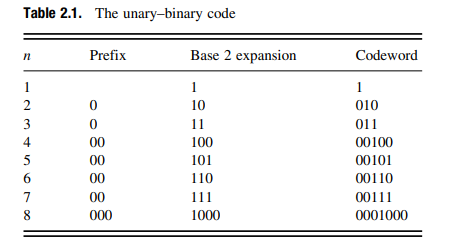

In [337]:
# Código unario-binario para codificar la longitud de coincidencias
def codigo_unario_binario(n):   # codifica un entero positivo n usando el código unario-binario:
    if n == 1:
        return '1'
    
    else:
        bin_expansion = format(n, 'b')              # Expansión binaria de n
        prefix_len = len(bin_expansion) - 1         # para calcular prefijo unario como len(bin_expansion) - 1 ceros\                          (log2 n)
        prefix_unary = '0' * prefix_len             # Genera 0s como prefijo unario
        return prefix_unary + bin_expansion


In [338]:
codigo_unario_binario (8)

'0001000'

In [339]:
# Decodificar longitud con código unario-binario
def decodif_unario_binario(binario, i):                # decodificar un número codificado en unario-binario desde una cadena binaria a partir de la posición i
    prefix_length = 0

    while binario[i] == '0':        # Contamos el número de ceros consecutivos para determinar prefix_length.
        prefix_length += 1
        i += 1

    # Leer (prefix_length + 1) bits para obtener la expansión binaria
    bin_expansion = binario[i:i + prefix_length + 1]
    n = int(bin_expansion, 2)   # Convertimos la expansión binaria a un entero n.
    i += prefix_length + 1      # Actualizamos i para apuntar después de los bits leídos

    return n, i

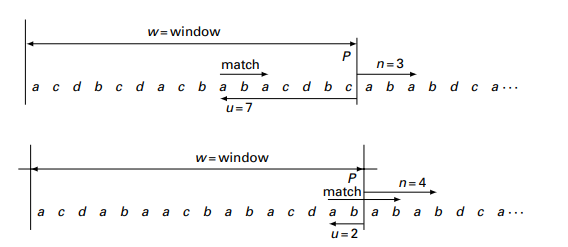

In [340]:
# algoritmo LZ77 - Compresión
def lz77_comprimir(texto, ventana_tamano):
    
    #u offset
    #n longi
    #w vent
    
    resultado_binario = []  # Guarda el resultado comprimido en binario
    u_bit_length = math.ceil(math.log2(ventana_tamano + 1))  # Calculamos el número de bits necesarios para representar u (el desplazamiento/offset), considerando ventana_tamano.

    # (1) Codificar los primeros w símbolos sin compresión
    for i in range(min(ventana_tamano, len(texto))):
        literal_bin = utf8_a_binary(texto[i])
        resultado_binario.append(literal_bin)  

    # (2) A partir de aquí, aplicar la compresión
    P = ventana_tamano              # Inicializamos el puntero P y variables para almacenar la mejor coincidencia encontrada.
    while P < len(texto):
        mejor_longitud = 0
        mejor_desplazamiento = 0

        # (3) Buscar la mayor coincidencia dentro de la ventana deslizante
        ventana_inicio = max(0, P - ventana_tamano)
        for j in range(ventana_inicio, P):
            longitud = 0
            while (P + longitud < len(texto)) and (texto[j + longitud] == texto[P + longitud]):     # Recorremos la ventana y comparamos caracteres para encontrar coincidencias.
                longitud += 1
                if j + longitud >= P:
                    break  # Evitar salir del límite de la ventana
            if longitud > mejor_longitud and longitud >= 2:     # Si encontramos una coincidencia mejor, actualizamos mejor_longitud y mejor_desplazamiento.
                mejor_longitud = longitud
                mejor_desplazamiento = P - j

        # (4) Si hay coincidencia n >= 2, codificar (n, u)
        if mejor_longitud >= 2:
            # Codificar longitud (n) usando código unario-binario
            longitud_bin = codigo_unario_binario(mejor_longitud)

            # Codificar desplazamiento (u) usando logw bits
            desplazamiento_bin = format(mejor_desplazamiento, f'0{u_bit_length}b')
            resultado_binario.append(longitud_bin + desplazamiento_bin)

            # Avanzar el puntero P
            P += mejor_longitud

        # Si no hay coincidencia, codificar el literal
        else:
            literal_bin = utf8_a_binary(texto[P])
            resultado_binario.append('1' + literal_bin)  # Usamos '1' como indicador de literal
            P += 1

    return ''.join(resultado_binario)

In [341]:
# algoritmo LZ77 - Descompresión
def lz77_descomprimir(binario, ventana_tamano):
    i = 0                                           # Inicializo el índice i para recorrer el binario.
    resultado = []
    u_bit_length = math.ceil(math.log2(ventana_tamano + 1))     # Calculamos u_bit_length de la misma forma que en la compresión.

    # (1) Decodificar los primeros w símbolos sin compresión
    for _ in range(ventana_tamano):
        if i + 8 > len(binario):
            break  # Evita exceder el límite

        literal_binario = binario[i:i + 8]
        literal = chr(int(literal_binario, 2))
        resultado.append(literal)
        i += 8

    # (2) A partir de aquí, decodificar el resto
    while i < len(binario):
        # Verificamos si es un literal
        if binario[i] == '1':
            i += 1
            literal_binario = binario[i:i + 8]
            literal = chr(int(literal_binario, 2))
            resultado.append(literal)
            i += 8

        else:
            # Es una coincidencia
            n, i = decodif_unario_binario(binario, i)
            u = int(binario[i:i + u_bit_length], 2)
            i += u_bit_length
            # Copiar la coincidencia en el resultado
            pos_inicio = len(resultado) - u
            
            for _ in range(n):
                resultado.append(resultado[pos_inicio])
                pos_inicio += 1

    return ''.join(resultado)

In [342]:
# Ejemplo de compresión y descompresión
texto_prueba = 'abcdabcdabcdabcdabcdabcdabcdabcd'
ventana_tamano = 8

# Comprimir el texto
binario_comprimido = lz77_comprimir(texto_prueba, ventana_tamano)
print("Binario comprimido:", binario_comprimido)

# Descomprimir el texto
texto_descomprimido = lz77_descomprimir(binario_comprimido, ventana_tamano)
print("\nTexto original:", texto_prueba)
print("Texto descomprimido:", texto_descomprimido)

assert texto_descomprimido == texto_prueba, "El texto descomprimido no coincide con el de prueba"

Binario comprimido: 0110000101100010011000110110010001100001011000100110001101100100000100010000001000100000010001000

Texto original: abcdabcdabcdabcdabcdabcdabcdabcd
Texto descomprimido: abcdabcdabcdabcdabcdabcdabcdabcd


In [343]:
len(binario_comprimido)

97

In [344]:
len(texto_prueba)*8

256

In [345]:
texto_prueba = 'abfabdabccabddfabdcbfab'
ventana_tamano = 8

# Comprimir el texto
binario_comprimido = lz77_comprimir(texto_prueba, ventana_tamano)
print("Binario comprimido:", binario_comprimido)

# Descomprimir el texto
texto_descomprimido = lz77_descomprimir(binario_comprimido, ventana_tamano)
print("\nTexto original:", texto_prueba)
print("Texto descomprimido:", texto_descomprimido)

assert texto_descomprimido == texto_prueba, "El texto descomprimido no coincide con el de prueba"

Binario comprimido: 0110000101100010011001100110000101100010011001000110000101100010101100011101100011011011110110010010110011001101011011000111011000100110110

Texto original: abfabdabccabddfabdcbfab
Texto descomprimido: abfabdabccabddfabdcbfab


In [346]:
len(binario_comprimido)

139

In [347]:
len(texto_prueba)*8

184

In [348]:
texto_prueba = '12345678'+512*"678"
ventana_tamano = 8

# Comprimir el texto
binario_comprimido = lz77_comprimir(texto_prueba, ventana_tamano)
print("Binario comprimido:", binario_comprimido)

# Descomprimir el texto
texto_descomprimido = lz77_descomprimir(binario_comprimido, ventana_tamano)
print("\nTexto original:", texto_prueba)
print("Texto descomprimido:", texto_descomprimido)

assert texto_descomprimido == texto_prueba, "El texto descomprimido no coincide con el de prueba"

Binario comprimido: 00110001001100100011001100110100001101010011011000110111001110000110011001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110001100110

In [349]:
len(binario_comprimido)

2373

In [350]:
len(texto_prueba)*8

12352

In [351]:
texto_prueba = '67867678678678678678678678678'
ventana_tamano = 8

# Comprimir el texto
binario_comprimido = lz77_comprimir(texto_prueba, ventana_tamano)
print("Binario comprimido:", binario_comprimido)

# Descomprimir el texto
texto_descomprimido = lz77_descomprimir(binario_comprimido, ventana_tamano)
print("\nTexto original:", texto_prueba)
print("Texto descomprimido:", texto_descomprimido)

assert texto_descomprimido == texto_prueba, "El texto descomprimido no coincide con el de prueba"

Binario comprimido: 0011011000110111001110000011011000110111001101100011011100111000001011000001100110001100110001000110

Texto original: 67867678678678678678678678678
Texto descomprimido: 67867678678678678678678678678


In [352]:
len(binario_comprimido)

100

In [353]:
len(texto_prueba)*8

232

In [354]:
texto_prueba = 'abcdexabcdxabcdefxxyabcde1289338abcdef4'
ventana_tamano = 32

# Comprimir el texto
binario_comprimido = lz77_comprimir(texto_prueba, ventana_tamano)
print("Binario comprimido:", binario_comprimido)

# Descomprimir el texto
texto_descomprimido = lz77_descomprimir(binario_comprimido, ventana_tamano)
print("\nTexto original:", texto_prueba)
print("Texto descomprimido:", texto_descomprimido)

assert texto_descomprimido == texto_prueba, "El texto descomprimido no coincide con el de prueba"


Binario comprimido: 011000010110001001100011011001000110010101111000011000010110001001100011011001000111100001100001011000100110001101100100011001010110011001111000011110000111100101100001011000100110001101100100011001010011000100110010001110000011100100110011001100110011100000110010101100110100

Texto original: abcdexabcdxabcdefxxyabcde1289338abcdef4
Texto descomprimido: abcdexabcdxabcdefxxyabcde1289338abcdef4


In [355]:
len(binario_comprimido)

276

In [356]:
len(texto_prueba)*8

312

In [361]:
# Generar la tabla de frecuencias condicionales
archivo_texto = "La_Divina_Comedia.txt"
N = 3           # Número de palabras para el análisis

tabla_frecuencias = generar_tabla_frecuencias_condicionales(archivo_texto, N)
guardar_tabla_frecuencias_en_archivo(tabla_frecuencias)

# Generar texto aleatorio basado en el modelo de Markov
longitud_texto = 1000
texto_generado = generar_texto_markov(tabla_frecuencias, longitud_texto, N)
guardar_texto_en_archivo(texto_generado)

# Comprimir y descomprimir usando LZ77
ventana_tamano = 64  # Tamaño de la ventana

# Comprimir el texto generado
binario_comprimido = lz77_comprimir(texto_generado, ventana_tamano)
print("Binario comprimido:", binario_comprimido)

# Descomprimir el texto
texto_descomprimido = lz77_descomprimir(binario_comprimido, ventana_tamano)
print("\nTexto original:", texto_generado)
print("Texto descomprimido:", texto_descomprimido)

# Prueba con assert para verificar que los textos son iguales
assert texto_descomprimido == texto_generado, "El texto descomprimido no coincide con el original."

# Calcular el índice de compresión
bits_originales = len(utf8_a_binary(texto_generado))
bits_comprimidos = len(binario_comprimido)
indice_compresion = bits_comprimidos / bits_originales * 100        # porcentual

print(f"\nBits originales: {bits_originales}")
print(f"Bits comprimidos: {bits_comprimidos}")
print(f"Comprimido un: {indice_compresion:.2f}%")

Tabla de frecuencias guardada en Tablas_Frecuencias.txt
Texto generado guardado en Fuente_Markov.txt
Binario comprimido: 011011100110111100100000011000010110110001100011011000010110111001111010011000010010000011101001011100000110111101100011011000010111001100100000011001000110010100100000011010010110011101101110011011110111001001100001011011100110001101101001011000010010000001100011011100100110010111101101011000010010000001100011011010010110110101100001011000100111010101100101001000000111001101100101011100100010000011100001011100100110001001101001011101000111001001101111001000000110010101101110001000000110010101101100001000000100111011101101101010011011110010000010110110000100011100010110100110111001110110001101001101100100000110011000101101001110011011101101011010011011011001011001010100010011101100010010001011110111010010110000110110111010111010001001110001011001001011001011011000100110001111010001111110110111010110111110110001110110010110111001010010000010111100110110000101101100010